# EDA - TAB FACT

#### Install required libraries

In [3]:
%pip install datasets
%pip install nltk
%pip install gensim
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import datasets
import numpy as np
import re
import nltk
import gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
dataset = datasets.load_dataset("tab_fact", "tab_fact")

In [7]:
train_df = dataset["train"].to_pandas()
test_df = dataset["test"].to_pandas()
validation_df = dataset["validation"].to_pandas()

In [50]:
print("number of rows: ", train_df.shape[0])
print("number of columns: ", train_df.shape[1])

number of rows:  92283
number of columns:  6


In [51]:
print("number of rows: ", test_df.shape[0])
print("number of columns: ", test_df.shape[1])

number of rows:  12779
number of columns:  6


In [52]:
print("number of rows: ", validation_df.shape[0])
print("number of columns: ", validation_df.shape[1])

number of rows:  12792
number of columns:  6


Train


In [53]:
train_df.head()

,id,table_id,table_text,table_caption,statement,label
0,0,2-15401676-3.html.csv,date#result#score#brazil scorers#competition\n...,1919 in brazilian football,haroldo be mention as a brazil scorer for 2 di...,1
1,0,2-15401676-3.html.csv,date#result#score#brazil scorers#competition\n...,1919 in brazilian football,4 of the 5 game be for the south american cham...,1
2,0,2-15401676-3.html.csv,date#result#score#brazil scorers#competition\n...,1919 in brazilian football,friedenreich be mention as a brazil scorer for...,1
3,0,2-15401676-3.html.csv,date#result#score#brazil scorers#competition\n...,1919 in brazilian football,there be 2 different game where the highest sc...,1
4,0,2-15401676-3.html.csv,date#result#score#brazil scorers#competition\n...,1919 in brazilian football,4 of the 5 game be play in may 1919,1


Test

In [54]:
test_df.head()

,id,table_id,table_text,table_caption,statement,label
0,0,2-1570274-4.html.csv,tournament#wins#top - 5#top - 10#top - 25#even...,tony lema,tony lema be in the top 5 for the master tourn...,1
1,0,2-1570274-4.html.csv,tournament#wins#top - 5#top - 10#top - 25#even...,tony lema,tournament that tony lema have participate in ...,1
2,0,2-1570274-4.html.csv,tournament#wins#top - 5#top - 10#top - 25#even...,tony lema,the only tournament that tony lema win in be t...,1
3,0,2-1570274-4.html.csv,tournament#wins#top - 5#top - 10#top - 25#even...,tony lema,tony lema do not win in the us open,1
4,0,2-1570274-4.html.csv,tournament#wins#top - 5#top - 10#top - 25#even...,tony lema,tony lema make it to the top 10 in the pga cha...,1


validation

In [55]:
validation_df.head()

,id,table_id,table_text,table_caption,statement,label
0,0,2-1859269-1.html.csv,round#clubs remaining#clubs involved#winners f...,turkish cup,"during the third round of the turkish cup , th...",1
1,0,2-1859269-1.html.csv,round#clubs remaining#clubs involved#winners f...,turkish cup,the highest number of winner from a previous r...,1
2,0,2-1859269-1.html.csv,round#clubs remaining#clubs involved#winners f...,turkish cup,süper lig be the most common league to win a r...,1
3,0,2-1859269-1.html.csv,round#clubs remaining#clubs involved#winners f...,turkish cup,the lowest number of new entry conclude a roun...,1
4,0,2-1859269-1.html.csv,round#clubs remaining#clubs involved#winners f...,turkish cup,round 1 of the turkish cup begin with 156 comp...,1


In [56]:
total_rows_in_datasets = test_df.shape[0] + validation_df.shape[0] + train_df.shape[0]
print("percentatge of train dataset", round(train_df.shape[0] / total_rows_in_datasets, 2) * 100, "%")
print("percentatge of test dataset", round(test_df.shape[0] / total_rows_in_datasets, 2) * 100, "%")
print("percentatge of validate dataset", round(validation_df.shape[0] / total_rows_in_datasets,2) * 100, "%")

percentatge of train dataset 78.0 %
percentatge of test dataset 11.0 %
percentatge of validate dataset 11.0 %


In [57]:
test_df.isnull().value_counts()

id     table_id  table_text  table_caption  statement  label
False  False     False       False          False      False    12779
Name: count, dtype: int64

We try to see the 10 most common captions

<Axes: xlabel='table_caption'>

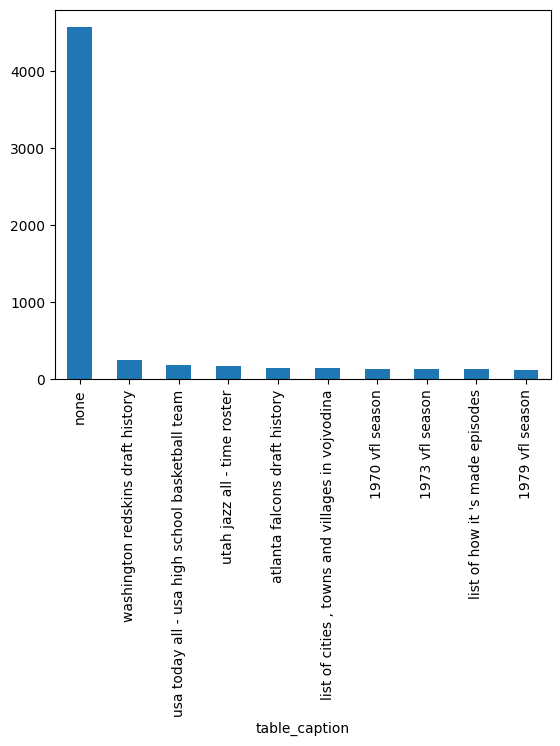

In [58]:
train_df['table_caption'].value_counts()[:10].plot(kind='bar')


We clean replace the none for np.nan, so we can visualitze better

<Axes: xlabel='table_caption'>

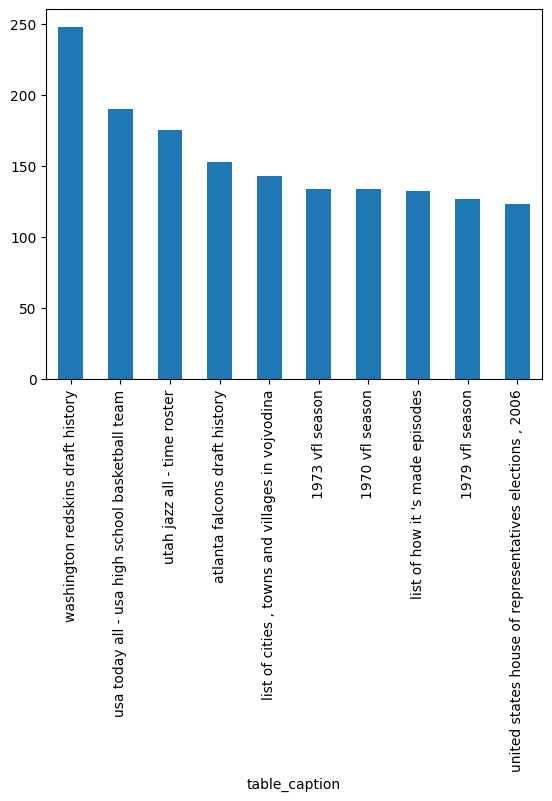

In [59]:
train_df['table_caption'].replace('none', np.nan, inplace=True)
train_df['table_caption'].value_counts()[:10].plot(kind='bar')

To have understand better the dataset, and try to know which are the topics related, We plot the 10 most common bigrams

[nltk_data] Downloading package punkt to /home/marc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<AxesSubplot:title={'center':'Most common bigrams'}>

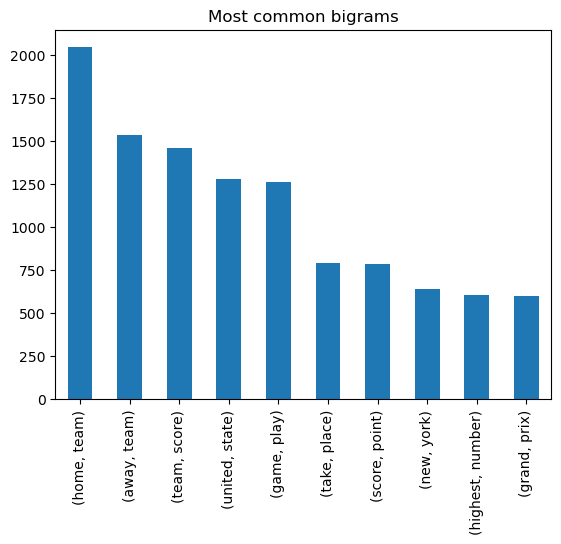

In [10]:
nltk.download('punkt')

def take_bigram(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = re.sub("[^A-Za-z']+", " ", text)
    tokens = gensim.utils.tokenize(text.lower(), deacc=True)
    tokens = [token for token in tokens if token not in stop_words]
    return list(list(nltk.ngrams(tokens, 2)))
            


bigrams = train_df['statement'].apply(take_bigram).explode()
bigrams.value_counts()[:10].plot(kind='bar',title='Most common bigrams')

We can see that the dataset has a lot of influence of United States  and sport related topics

In [60]:
def count_words(text):
    return len(text.split(" "))

It is also important know the lenght of the text, due to we are going to use NLP models and the lenght of the text can have a direct impact

<Axes: title={'center': 'lenght of the text'}, ylabel='Frequency'>

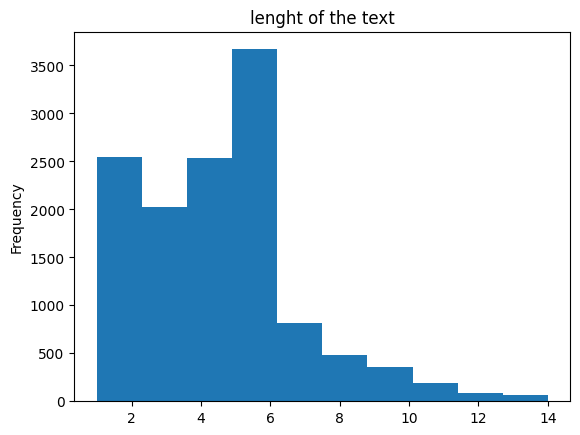

In [64]:
test_df["length"] =  test_df["table_caption"].apply(count_words)
test_df["length"].plot(kind="hist", title="lenght of the text") 

We revise that the proportion of False and True statements are similiar.

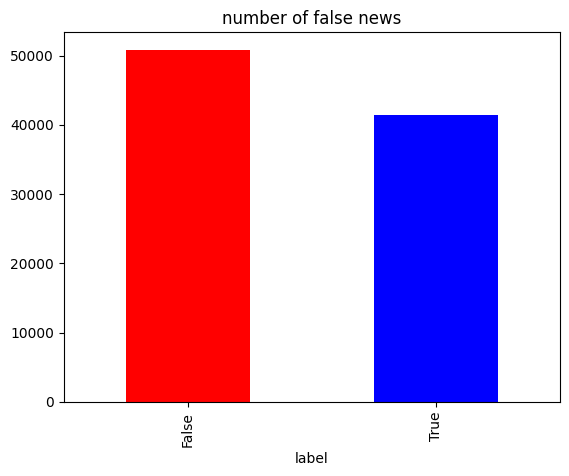

In [65]:

train_df["label"].value_counts().plot(kind="bar", title="number of false news", color=['red', 'blue']).set_xticks([1,0], ['True', 'False'])

To see what is the most common topics another thing we can do is create a wordCloud of the statement

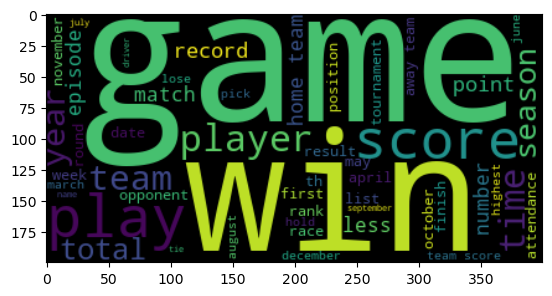

In [8]:
stop_words = set(nltk.corpus.stopwords.words('english'))
full_text  = ''
for text in train_df['statement']:
    full_text += text
full_text =     text = re.sub("[^A-Za-z']+", " ", full_text)
full_text = full_text
wordcloud = WordCloud(background_color = "black", stopwords = stop_words , max_words = 50).generate(full_text)
plt.imshow(wordcloud, interpolation='bilinear')

To be sure that the test and the train are similar, we check that they have the same bigrams

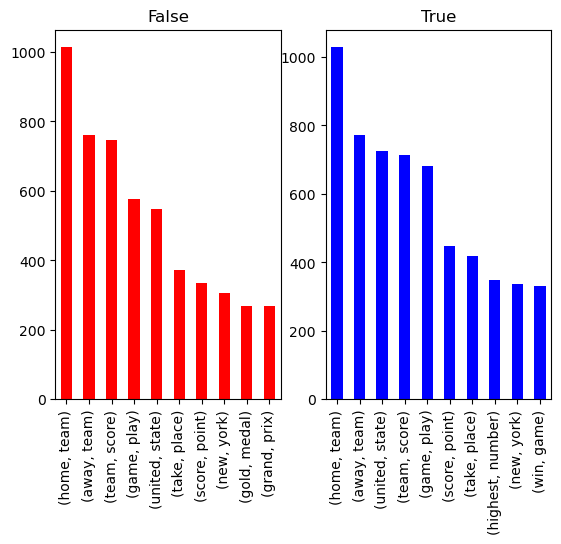

In [11]:
false_statement = train_df.loc[train_df['label'] == 0]
true_statement = train_df.loc[train_df['label'] == 1] 

false_bigram = false_statement['statement'].apply(take_bigram).explode()
true_bigram = true_statement['statement'].apply(take_bigram).explode()

fig, axs = plt.subplots(1,2)  # 
false_bigram.value_counts()[:10].plot(ax=axs[0], kind='bar', color='red', title='False')
true_bigram.value_counts()[:10].plot(ax=axs[1], kind='bar', color='blue', title='True')
plt.show()